# CNN on MNIST

#### Importing the Libraries

In [1]:
import numpy as np
import matplotlib
# matplotlib.use("TkAgg")
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist  # // loading the mnist dataset is from keras not sklearn
from keras.models import Sequential
from keras.layers import Dense  # // DNN
from keras.optimizers import Adam
from keras.utils import to_categorical  # // multi-classification (One Hot Encoding)

import random

## New imports
from keras.layers import Flatten
from keras.layers import Conv2D  # // it's not in layers.convolutional as in the video anymore
from keras.layers import MaxPooling2D  # // it's not in layers.convolutional as in the video anymore

from keras.layers import Dropout
from keras.models import Model   # // to get the class API

#### Importing the Data/ Train Test Split

In [2]:
np.random.seed(0)

# // here, we won't use the train_test_split function: (X_train, X_test, y_train, y_test)
# // instead:
# (X_train, y_train), (X_test, y_test), X:input features (MNIST images), 28x28 pixels

(images_train, labels_train), (images_test, labels_test) = mnist.load_data()

# // this returns 60,000 MNIST images to the train set and 10,000 ones to the test set

# !! print("images_train.shape = ", images_train.shape)  # // images_train.shape =  (60000, 28, 28)
# !! print("images_test.shape = ", images_test.shape)    # // images_test.shape =  (10000, 28, 28)
# !! print("The number of labels: ", labels_train.shape[0] )
# // this shows 60,000 which is 60,000 labels for the 60,000 images

#### assert Method (ensure the imported data is accurate)

In [3]:
# // This is useful whenever you want to import complex datasets.
# // The (assert) method takes in 1 arg,
# // the arg is usually just a condition that is either going to be True or False
# // If the condition is met, the code will run smoothly with no issues,
# // However, if the condition is not met, the code will stop running and will display an error to alert
# // the user that something went wrong.

# // this confirms that 60k images have 60k labels, if not, the code won't run
assert (images_train.shape[0] == labels_train.shape[0]), "The number of images isn't equal to the number of labels"
# // same for the 10k of the test set
assert (images_test.shape[0] == labels_test.shape[0]), "The number of images isn't equal to the number of labels"
# // the same goes for the shape of the images
assert (images_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28x28."
assert (images_test.shape[1:] == (28, 28)), "The dimensions of the images are not 28x28."

In [4]:
number_of_samples = []
number_of_classes = 10
cols = 5

#### plotting samples of the MNIST Dataset

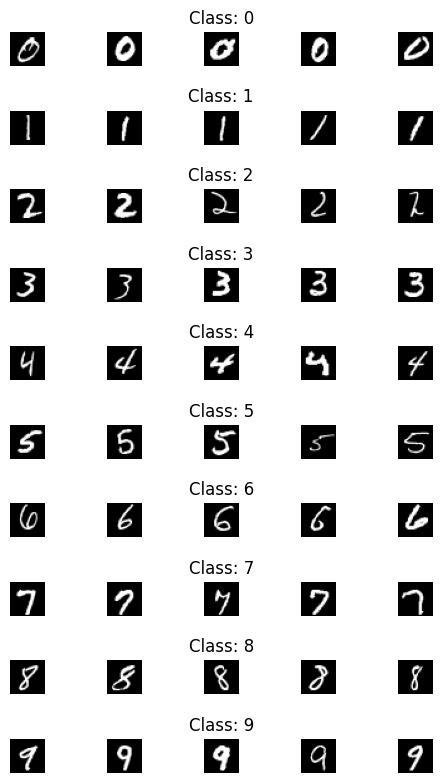

In [5]:
fig, axes = plt.subplots(nrows=number_of_classes, ncols=cols, figsize=(5, 8) )
# // figsize is the size of each grid (subplot), first the width then the height
# // You can see the effect of figsize when you minimize the pic, not maximize it.
fig.tight_layout()
# // this is used to automatically deal with overlapping and separates the figures/subplots better

for col in range(cols): # // each col of the 5
    for row in range(number_of_classes): # // each row(class) of the 10
        image_selected = images_train[labels_train == row] # // this is used to split the data,
        # // with the conditional statement [labels_train == col(name of class)],
        # // so that row 0 will have MNIST images of class 0, etc…
        axes[row][col].imshow(image_selected[random.randint(0, len(image_selected) - 1), : , : ],
                          cmap=plt.get_cmap("gray") )
        # // random.randint(), gets you a random integer between the 2 integers you entered.
        # // leave the rest blank (:), to ensure you get the full image, the full (28x28) image
        # // the images get displayed but not properly, and that's because
        # // the default colormap of matplotlib is (Viridis),
        # // which is a colorful color map that is useful for some data.
        # // in our case, we want a grayscale images.

        # // if you don't want the images to be in a labeled axis
        axes[row][col].axis("off")

        if col == 2:
            axes[row][col].set_title("Class: " + str(row) ) # // to name the class with the value it has

            number_of_samples.append(len(image_selected) )
        # // You need to include this inside the if block, to take only one sample of the 10 classes.
        # // which is in col = 2 in this case. You can do another if with whatever col you want,it's the same
        # // if you don't, 5 samples of the 10 classes (bec of no. of cols) will be added, which is WRONG.

#### Bar plot to show the number of images each class has

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


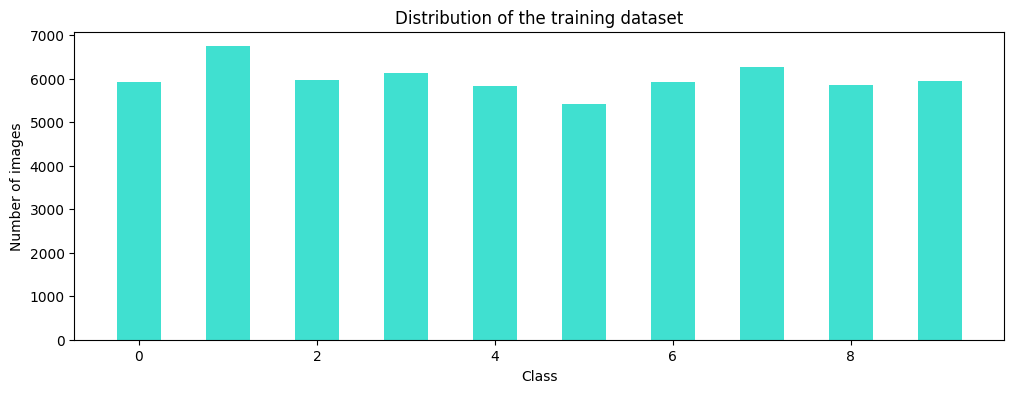

In [6]:
print(number_of_samples)
# // this shows the amount of images belonging to each class.
# // [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

# // To visualize this with a bar-plot

plt.figure(figsize=(12, 4) )
plt.bar(range(0, number_of_classes), number_of_samples, color="turquoise", width=0.5)
# // first arg is the x-coordinate (each class),
# // 2nd arg is the y-coordinate (number of images per each class)-(number_of_samples array)
# // width arg is the width of the bars.
plt.title('Distribution of the training dataset')
plt.xlabel('Class')
plt.ylabel('Number of images')

plt.show()

#### One Hot Encoding

In [7]:
labels_train_OHE = to_categorical(labels_train, 10)
labels_test_OHE = to_categorical(labels_test, 10)

#### Normalization (Feature Scaling)

In [8]:
# // here we just divide by 255
images_train_N = images_train / 255
images_test_N = images_test / 255

// well, for instance, our training data are 60k images.

// Each image has a pixel intensity ranging between 0 and 255.

// So now we want to scale it between 0 and 1

// This normalization process is important as it scales down our features to a uniform range and decreases

// variance among our data.

// Due to the nature of the mathematical operations used inside the neural network.

// We need to ensure that our data has low variance.

// This helps the neural network better deal with the input data and to learn more quickly and accurately.

#### Flattening / Reshaping

In [9]:
print("images_train shape = ", images_train.shape)
print("images_test shape = ", images_test.shape)

images_train shape =  (60000, 28, 28)
images_test shape =  (10000, 28, 28)


// Now that we have a normalized data set, we are going to flatten our images.

// We currently have images that have the shape of a two-dimensional array.

// Each image is 28 by 28 pixels, 784 pixels in total.

// However, due to the structure of our neural network, our input values are going to be multiplied by

// The weight matrix connecting our input layer to our first hidden layer.

// To conduct matrix multiplication, we must make our images one dimensional.

// We cannot pass the array in the way that it's currently shaped.

// That is, instead of them being 28 rows by 28 columns, we must flatten each image into a single row of 784 pixels.

In [10]:
number_of_pixels = 28 * 28  # // 784
images_train = images_train.reshape(images_train.shape[0], number_of_pixels )
images_test = images_test.reshape(images_test.shape[0], number_of_pixels)
# // we won't change the first dim (60k), we will change the 28 x 28 to 1D of 784 (flatten it to 1D)

print("images_train new shape = ", images_train.shape) # // images_train shape = (60000, 784)
print("images_test new shape = ", images_test.shape)  # // images_test shape = (10000, 784)

images_train new shape =  (60000, 784)
images_test new shape =  (10000, 784)


#### Flattening / Reshaping, ** modifying it

In [11]:
print("images_train shape = ", images_train.shape)
print("images_test shape = ", images_test.shape)

images_train shape =  (60000, 784)
images_test shape =  (10000, 784)


In [12]:
# // Previously, we needed to Flatten it into a 1D to enter the pixels as inputs into the NN
# // in CNNs, we don't need to, but we need to add Depth to them, 1 for (Grayscale images)

images_train = images_train.reshape(images_train.shape[0], 28, 28, 1)
images_test = images_test.reshape(images_test.shape[0], 28, 28, 1)

print("images_train new shape = ", images_train.shape)
print("images_test new shape = ", images_test.shape)

images_train new shape =  (60000, 28, 28, 1)
images_test new shape =  (10000, 28, 28, 1)


## define LeNet model

In [13]:
def leNet_model():
    ### model layers
    nn_model = Sequential()
    ## Conv layer
    nn_model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu',
                        strides=1, padding="same"))
    ## Max-Pooling layer
    nn_model.add(MaxPooling2D(pool_size=(2, 2) ) )
    ## Conv Layer
    nn_model.add(Conv2D(15, (3, 3), activation="relu", strides=1, padding="same") )
    ## Max-pooling layer
    nn_model.add(MaxPooling2D(pool_size=(2, 2) ) )
    ## Flatten layer
    nn_model.add(Flatten() )
    ## DNN layers/ Hidden layers
    nn_model.add(Dense(units=500, activation="relu") )
    ## ** Dropout Layer
    nn_model.add(Dropout(0.5))
    ## Output Layer
    nn_model.add(Dense(units=number_of_classes, activation="softmax"))

    ### Compilation
    nn_model.compile(optimizer=Adam(learning_rate=0.01), loss="categorical_crossentropy",
                     metrics=["accuracy"])

    return nn_model

 **Description:**

!! line 237: we add the Conv2D layer.

'''

** First argument: number of "filters/Kernels".

// This is a number that depends on experiencing with the dataset

// for MNIST dataset, 30 is a good number according to the video.

// keep in mind, as the number of filters increases, the number of parameters also increases, which demands more computing power.


** Second Argument: a Tuple to define "the size of the filters".

// 5 x 5 is suitable for MNIST.

// Remember that Kernels in CONV layer are predefined (have their own values originally).


** Third Argument: a tuple of "the input shape" of the pics


** Forth Argument: the "Activation Function" of the Layer. "relu" which we described

// After the Conv layer, our 28 x 28 image is going to be reduced down to 30 feature maps each one is 24 x 24.

// Therefore, the output volume of the Conv layer will have "Feature maps" with depth = 30

// Considering that each filter is (5 x 5) and each pixel inside the filter has it's own value,

/ then a "single filter" will have 25 values or adjustable parameters, Considering that we have 30 filters, this puts up at 30 x 25 = 750, 750 parameters.

// Considering that each "Filter" has it's own "Bias value", this puts us at 780 adjustable parameters for this layer.


** Fifth Argument: "Strides".

// "Strides" is the "Kernel" step "convolved" on the image.

// the smaller the "stride", the more the "kernel convolution operations" and thus the more output.

// Default is 1, so we don't need to add it as well.


** Sixth Argument: "Padding"

// When conducting "Conv operations", the Spatial size of the image gets smaller, as we lose the information at the borders, even if we use a "stride of 1.

// So, "Padding is used to preserve the "Spatial dimensionality" of the image.

*"half-padding" or "same-padding", simply ensures the output size is the "same" as the input size.

// we basically add two pixel thick layers of "padding", each pixel value = 0.

// Convolving the "Kernel", notice now that even the info at the borders is now processed more, thus outputting an image with the "same dimensions", thus increasing the performance.

*"Padding arguments" are: "valid", "casual" or "same", if you don't select either, the default is "None" or "valid"

// "valid" is None, not using "Padding"

// Here we won't use it, why?

// Because, if you see the pics of the MNIST dataset, you will see

/the numbers (the important thing we are focusing on) is centered on the image.

'''


!! Line 240: we add the max-pooling layer
'''

*only argument (for now): "Pooling size" (size of the Pooling Kernel)

// (2 x 2) is sufficient

// After the Pooling process, the shape of our convoluted image is going to go from a (24, 24, 30)

/ to a smaller shape of (12, 12, 30)

'''

// We then add another "Conv and max-pooling" layers.

!! Line 242: 2nd Conv layer
'''
// we are going to use "15 filters" on this layer as our image is smaller now, and smaller filter size.

// Notice that now the input parameters entering this Conv layer is much larger of the image entering the first

/ Conv layer, since it has depth = 30.

// So, each filter must be applied to each Layer, which results in 15 * 30 * (3 * 3) = 4050 parameters

// adding "Bias" 4050 + 15 = 4065 parameters

// way more than 780 parameters of the initial Conv layer.

// the output of this will be (10, 10, 15)

'''



!! Line 246: Flatten layer

'''

// This is used to flatten our data to enter them to the typical Deep Neural Network

// This will take the output shape from the 2nd Max-Pooling layer of (1, 5, 5, 15)
/ to (1, 375)

// 1 is the None is in the summary of the NN.

// You need to have the input shape entering a NN to be ** 1 row


'''



!! Line 247: DNN

Number of nodes/ "units" = 500

AF = "relu"

// No need to define the "input_dim" argument

'''

!! Line: Dropout Layer
// in the NB

#### Model's summary

In [14]:
nn_model = leNet_model()

nn_model.summary()

D:\coding projects\PyCharm projects\new projects\S-D-C-2\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 30)        │        780 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 30)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 15)        │      4,065 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 15)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 735)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 500)               │    368,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 500)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 10)                │      5,010 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 377,855 (1.44 MB)

 Trainable params: 377,855 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

inp units * layer's units + Bias of L. units

(375 * 500) + 500

#### Model Fitting

In [15]:
nn_model_fit = nn_model.fit(images_train_N, labels_train_OHE, validation_split=0.1, batch_size=400, epochs=12, verbose=True, shuffle=True)

Epoch 1/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.8053 - loss: 0.6088 - val_accuracy: 0.9832 - val_loss: 0.0582
Epoch 2/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9782 - loss: 0.0730 - val_accuracy: 0.9882 - val_loss: 0.0405
Epoch 3/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.9822 - loss: 0.0549 - val_accuracy: 0.9867 - val_loss: 0.0419
Epoch 4/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.9847 - loss: 0.0482 - val_accuracy: 0.9907 - val_loss: 0.0369
Epoch 5/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.9864 - loss: 0.0438 - val_accuracy: 0.9903 - val_loss: 0.0347
Epoch 6/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9864 - loss: 0.0429 - val_accuracy: 0.9905 - val_loss: 0.0348
Epoch 7/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9889 - loss: 0.0343 - val_accuracy: 0.9907 - val_loss: 0.0344
Epoch 8/12
135/135 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.9897 - loss: 0.0315 - 

#### saving/loading the model

In [16]:
"""

from keras.models import load_model

# // creates a HDF5 file nn_model.save('my_model.h5')  # / the hdf5 is wrong(old way)

# // creates a keras file (new way of saving)
# nn_model.save('11.2.CNN_model_MNIST_thirdModel.keras')

# // deletes the existing model
# del nn_model

# // returns a compiled model
nn_model = load_model('11.2.CNN_model_MNIST_thirdModel.keras')

"""

"\n\nfrom keras.models import load_model\n\n# // creates a HDF5 file nn_model.save('my_model.h5')  # / the hdf5 is wrong(old way)\n\n# // creates a keras file (new way of saving)\n# nn_model.save('11.2.CNN_model_MNIST_thirdModel.keras')\n\n# // deletes the existing model\n# del nn_model\n\n# // returns a compiled model\nnn_model = load_model('11.2.CNN_model_MNIST_thirdModel.keras')\n\n"

#### Plotting the history (Accuracy and Error plots) ** including the Validation

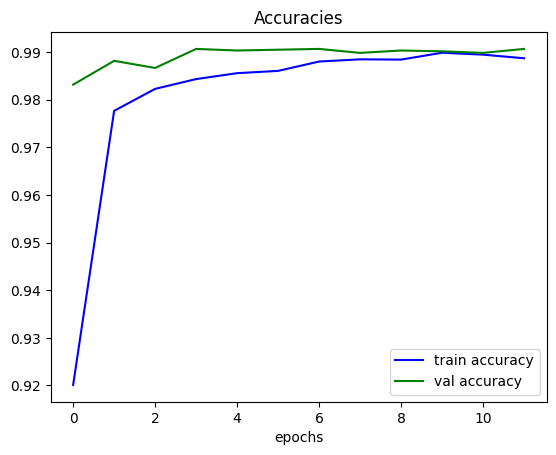

In [18]:
## Accuracy plot

plt.plot(nn_model_fit.history['accuracy'], label= "train accuracy", color="blue" )
plt.plot(nn_model_fit.history['val_accuracy'], label="val accuracy", color="green" )

plt.xlabel('epochs')
# plt.legend(['accuracy'] )
plt.legend()
plt.title('Accuracies')
plt.show()

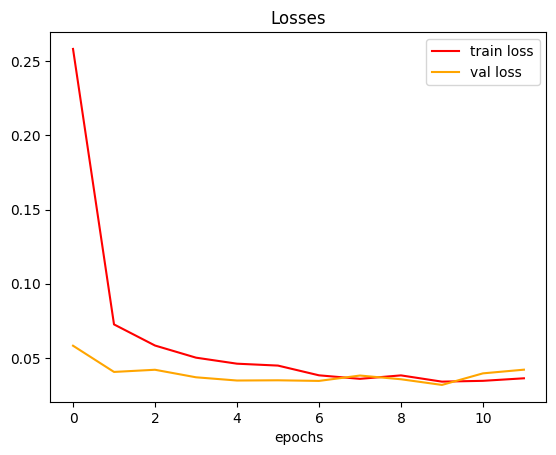

In [19]:
## Error plot

loss_plot = plt.plot(nn_model_fit.history['loss'], label = 'train loss', color = "red" )

val_loss_plot = plt.plot(nn_model_fit.history['val_loss'], label='val loss', color = "orange")

plt.xlabel('epochs')
# plt.legend(['loss'] )
plt.legend()
plt.title('Losses')
plt.show()

#### Plotting the url MNIST image of "2"

<Response [200]>


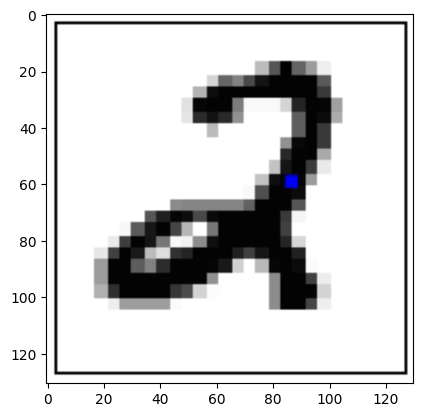

In [20]:
import requests
from PIL import Image  # // Python Imaging Library

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'

response = requests.get(url, stream=True)
print(response)  # -> <Response [200]>

image = Image.open(response.raw)
plt.imshow(image)

!! Line 565, 567, 568

// a link for a MNIST photo of 2

// this will take the url of the image.

// stream arg = True so that the request doesn't download the entire image into memory

// this means it returns 200 which is a signal that there is a response

// we can now use the raw content of the response to obtain the image


!! Line 570, 571

// using the raw content of the response to print the image

#### Manipulating the image "2" to suit our NN Model

In [21]:
import cv2

## Convert the image to array
image_array = np.asarray(image)
print("image_array shape: ", image_array.shape) # -> image_array shape: (131, 130, 3)

image_array shape:  (131, 130, 3)


In [22]:
## Resize the image
image_resized = cv2.resize(image_array, (28, 28))
print(image_resized.shape)  # -> (28, 28, 3)

(28, 28, 3)


(28, 28)


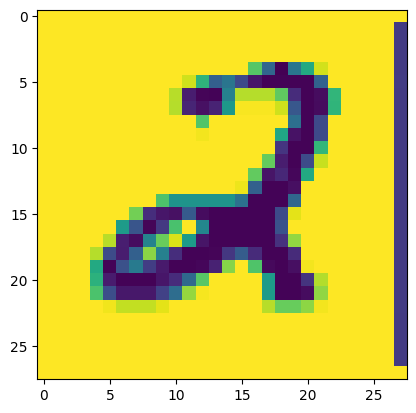

In [23]:
## Convert image to Gray-Scale
image_resized_GS = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)
print(image_resized_GS.shape)  # -> (28, 28)
plt.imshow(image_resized_GS)

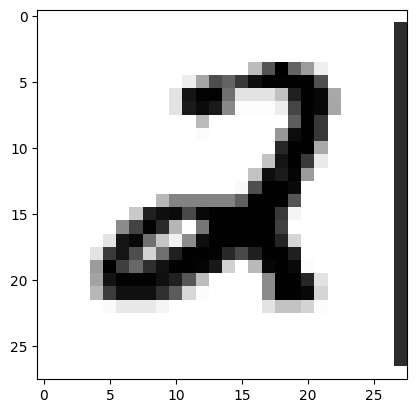

In [24]:
plt.imshow(image_resized_GS, cmap=plt.get_cmap("gray") )

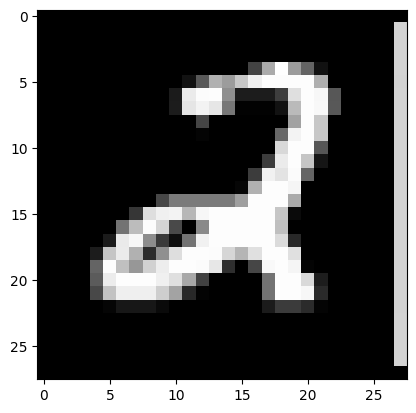

In [25]:
## Changing the look of the image
image_resized_GS_bit = cv2.bitwise_not(image_resized_GS)
plt.imshow(image_resized_GS_bit, cmap=plt.get_cmap("gray") )

!! Lines 602, 603: Convert the image to array

'''

// this function wasn't discussed before, what it simply does is convert our data into an array

'''


!! Lines 606, 607: Resize the image

'''

// we need to resize it to 28x28, because our NN was trained on 28x28 images

'''


!! Line 611, 613, 614: Convert image to Gray-Scale

'''

// convert color is the name of the function

// we need to convert it to grayscale,

// to lower the complexity and resources consumed and also because of the upper reason.

// BGR is the same as RGB

// so now the image has become 2D

// pic "2" is like that, because of the default colormap of matplotlib being that color.

** Line 614 is the better way to show it.

'''


!! Lines 617, 618: Changing the look of the image

'''

// There is a new problem, the NN was trained on images with white numbers and black background.

// to solve this, we use the function "bitwise_not"

// what's that going to do is every 0 pixel value will be 255 and vice versa.

// basically entering the pixels through a Not gate like situation.

'''

#### Doing the same manipulation we did to the images trained

In [27]:
image_resized_GS_bit_N = image_resized_GS_bit / 255
# image_resized_GS_bit_N = image_resized_GS_bit_N.reshape(1, 784)  # // 1 row and 784 cols
image_resized_GS_bit_N = image_resized_GS_bit_N.reshape(1, 28, 28, 1)

# plt.imshow(image_resized_GS_bit_N, cmap=plt.get_cmap("gray"))

// 'resize' is different from 'reshape'.

// line 665 is for the old DNN

// Line 666 is for the CNN

In [28]:
print(image_resized_GS_bit_N)

[[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.82352941]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [

#### Model's Prediction for image "2"

In [29]:
nn_model_class_prediction = np.argmax(nn_model.predict(image_resized_GS_bit_N), axis=1)
print("Model's prediction for the image of \"2\" is: " + str(nn_model_class_prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
Model's prediction for the image of "2" is: [2]


#### Plotting the url MNIST image of "3"

<Response [200]>


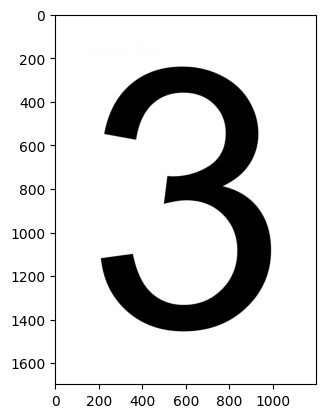

In [30]:
import requests
from PIL import Image  # // Python Imaging Library

url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'

response = requests.get(url, stream=True)
print(response)  # -> <Response [200]>

image = Image.open(response.raw)
plt.imshow(image)

#### Manipulating the image "3" to suit our NN Model

In [31]:
import cv2

## Convert the image to array
image_array = np.asarray(image)
print("image_array shape: ", image_array.shape) # -> image_array shape: (131, 130, 3)

## Resize the image
image_resized = cv2.resize(image_array, (28, 28))
print(image_resized.shape)  # -> (28, 28, 3)

image_array shape:  (1697, 1200, 3)
(28, 28, 3)


(28, 28)


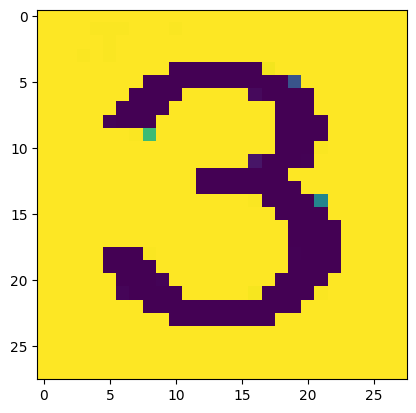

In [32]:
## Convert image to Gray-Scale
image_resized_GS = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)
print(image_resized_GS.shape)  # -> (28, 28)
plt.imshow(image_resized_GS)

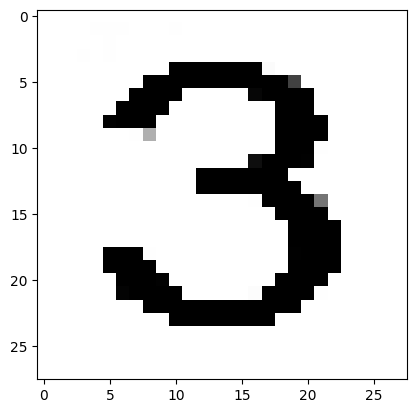

In [33]:
plt.imshow(image_resized_GS, cmap=plt.get_cmap("gray") )

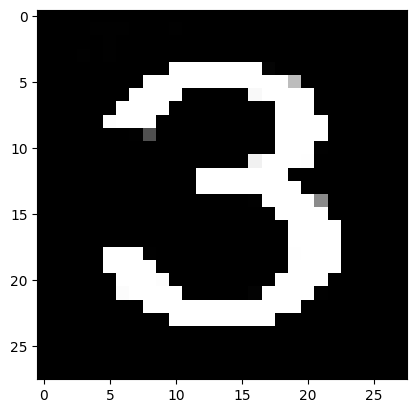

In [35]:
## Changing the look of the image
image_resized_GS_bit = cv2.bitwise_not(image_resized_GS)
plt.imshow(image_resized_GS_bit, cmap=plt.get_cmap("gray") )

#### Doing the same manipulation we did to the images trained

In [36]:
image_resized_GS_bit_N = image_resized_GS_bit / 255
# image_resized_GS_bit_N = image_resized_GS_bit_N.reshape(1, 784)  # // 1 row and 784 cols
image_resized_GS_bit_N = image_resized_GS_bit_N.reshape(1, 28, 28, 1)

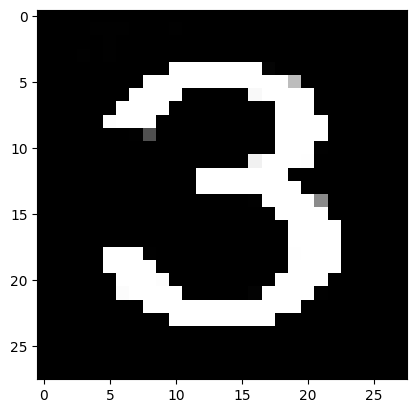

In [37]:
plt.imshow(image_resized_GS_bit, cmap=plt.get_cmap("gray"))

#### Model's Prediction for image "3"

In [38]:
nn_model_class_prediction = np.argmax(nn_model.predict(image_resized_GS_bit_N), axis=1)
print("Model's prediction for the image of \"3\" is: " + str(nn_model_class_prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Model's prediction for the image of "3" is: [3]
